<a href="https://colab.research.google.com/github/AdamayB/Tensorflow_Zero_to_Mastery/blob/main/01_Regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network using TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# Create data

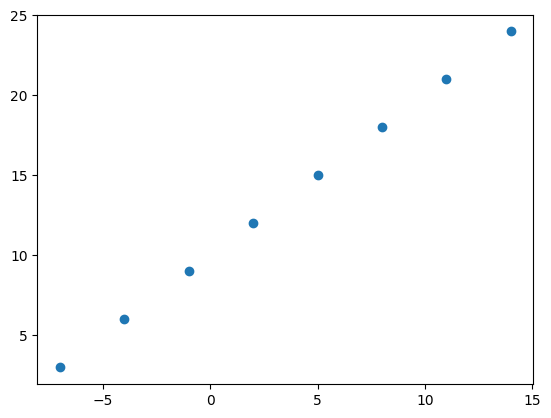

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7,-4,-1,2,5,8,11,14])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]);

# Visualize
plt.scatter(X,y);

# Input and Output shape

In [3]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [4]:
# Turn NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model
2. Compiling model- define loss function and optimizer and evaluation matrix
3. Fitting the model



In [6]:
tf.random.set_seed(42)

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)



Epoch 1/5
1/1 [==============================] - 1s 578ms/step - loss: 8.4709 - mae: 8.4709
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 8.3384 - mae: 8.3384
Epoch 3/5
1/1 [==============================] - 0s 19ms/step - loss: 8.2059 - mae: 8.2059
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 8.0734 - mae: 8.0734
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 7.9409 - mae: 7.9409


In [7]:
# Trying to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 190ms/step


array([[27.451895]], dtype=float32)

In [11]:
y_pred=model.predict([99.0])

1/1 [==============================] - 0s 133ms/step


In [12]:
y_pred

array([[159.62575]], dtype=float32)

In [13]:
y_pred+7.9409

array([[167.56665]], dtype=float32)

## Improving model
Improving by altering steps while creating model

1. **Creating Model:** Increase number of dense layers and change activation method
2. **Compiling Model:** change optimization function and change learning rate of the optimization function
3. **Fitting Model:**Increase number of epochs or provide more data


In [14]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 496ms/step - loss: 12.2256 - mae: 12.2256
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.0931 - mae: 12.0931
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 11.9606 - mae: 11.9606
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 11.8281 - mae: 11.8281
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.6956 - mae: 11.6956
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 11.5631 - mae: 11.5631
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.4306 - mae: 11.4306
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2981 - mae: 11.2981
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1656 - mae: 11.1656
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0331 - mae: 11.0331
Epoch 11/100
1/1 [==============================

In [26]:
y_pred=model.predict([9.0])
y_pred

1/1 [==============================] - 0s 75ms/step


array([[16.092083]], dtype=float32)

In [27]:
# Making more adjustments
# adding extra layer
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #stochastic gradient descent)
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 486ms/step - loss: 14.8529 - mae: 14.8529
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.1890 - mae: 14.1890
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5340 - mae: 13.5340
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8911 - mae: 12.8911
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 12.2572 - mae: 12.2572
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6166 - mae: 11.6166
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9696 - mae: 10.9696
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2977 - mae: 10.2977
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5978 - mae: 9.5978
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 8.8659 - mae: 8.8659
Epoch 11/100
1/1 [==============================] - 

In [32]:
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 40ms/step


array([[32.30183]], dtype=float32)

array([[2.6509151]], dtype=float32)

## Common ways to improve a deep model(Go Step By Step):
* Adding layers
* Increase the number of hidden units
* Change the activation functions
* Change the optimization function
* Change Learning rate(Most important hyperparamter to change)
* Fitting on more data

In [39]:
# Rebuilding

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 597ms/step - loss: 13.6766 - mae: 13.6766
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5720 - mae: 13.5720
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4675 - mae: 13.4675
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 13.3630 - mae: 13.3630
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.2585 - mae: 13.2585
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 13.1540 - mae: 13.1540
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0496 - mae: 13.0496
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 12.9451 - mae: 12.9451
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8407 - mae: 12.8407
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 12.7362 - mae: 12.7362
Epoch 11/100
1/1 [==============================

In [41]:
y_pred=model.predict([11.])
y_pred

1/1 [==============================] - 0s 42ms/step


array([[20.067604]], dtype=float32)